# 세종시 지역별 버스 승하차 데이터

In [1]:
from pandas import read_excel, DataFrame, to_datetime, date_range
from matplotlib import pyplot as plt

In [2]:
origin = read_excel("111_지역별승하차.xls", index_col='일자')
origin.head()

,행정구역,승차,하차,환승
일자,,,,
2020년01월01일,가람동,38,43,5
2020년01월01일,고운동,997,900,110
2020년01월01일,금남면,490,480,28
2020년01월01일,나성동,892,765,119
2020년01월01일,다정동,175,251,19


In [3]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33068 entries, 2020년01월01일 to 2023년10월31일
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    33068 non-null  object
 1   승차      33068 non-null  int64 
 2   하차      33068 non-null  int64 
 3   환승      33068 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [4]:
df = origin.copy()

In [5]:
df1 = df.query("행정구역 == '합계'")
df1.head()

,행정구역,승차,하차,환승
일자,,,,
2020년01월01일,합계,16533,14347,2600
2020년01월02일,합계,36164,31159,5652
2020년01월03일,합계,38389,32163,6002
2020년01월04일,합계,24847,20774,3928
2020년01월05일,합계,19212,16882,2970


In [6]:
df1['일자'] = to_datetime(df1.index, format='%Y년%m월%d일')
df1.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12132\786330850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['일자'] = to_datetime(df1.index, format='%Y년%m월%d일')


,행정구역,승차,하차,환승,일자
일자,,,,,
2020년01월01일,합계,16533,14347,2600,2020-01-01
2020년01월02일,합계,36164,31159,5652,2020-01-02
2020년01월03일,합계,38389,32163,6002,2020-01-03
2020년01월04일,합계,24847,20774,3928,2020-01-04
2020년01월05일,합계,19212,16882,2970,2020-01-05


In [7]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

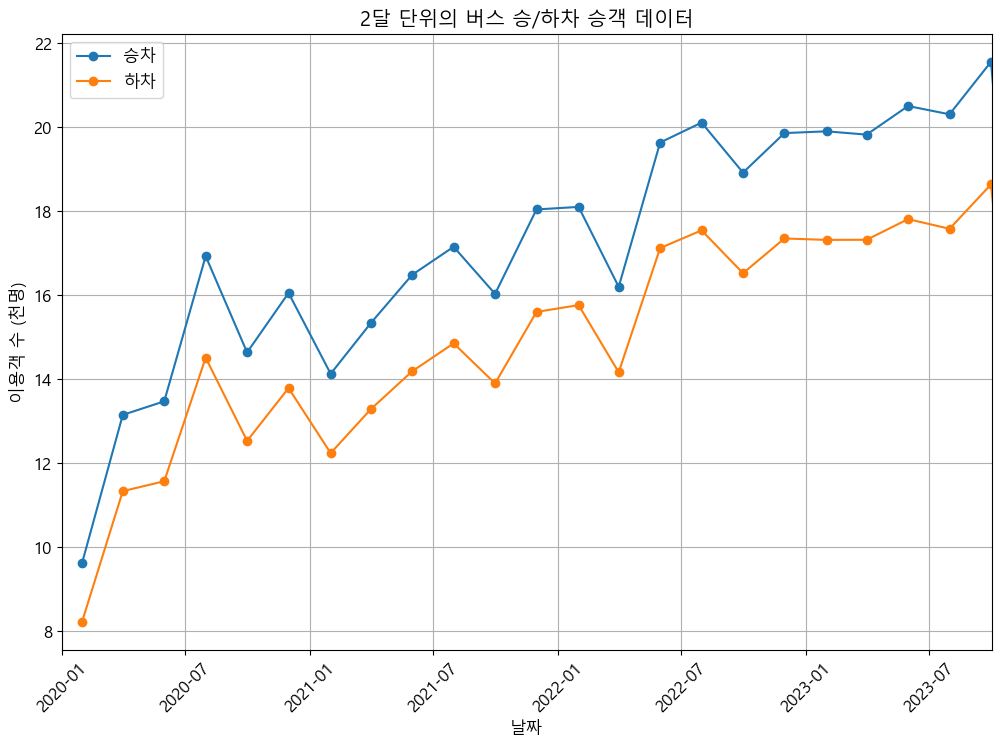

In [8]:
from matplotlib.ticker import FuncFormatter
# Set the figure size
plt.figure(figsize=(12, 8))

df2weeks = df1.resample('2M', on='일자').sum()

plt.plot(df2weeks.index, df2weeks['승차'], label='승차', marker='o')
plt.plot(df2weeks.index, df2weeks['하차'], label='하차', marker='o')

plt.title('2달 단위의 버스 승/하차 승객 데이터')
plt.xlabel('날짜')
plt.xticks(rotation=45)


# Define a custom formatting function to display Y axis labels in '만명' format
def format_y_ticks(value, _):
    return f'{int(value/10e4)}'

plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_ticks))
plt.ylabel('이용객 수 (천명)')

start = to_datetime('2020-01-01')
end = to_datetime('2023-10-01')
plt.xlim(start, end)
# plt.ylim(0, 22)  # You can adjust the Y axis limits as needed
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# plt.figure(figsize=(12, 8))

# # Convert '일자' column to datetime if it's not already in datetime format
# df1['일자'] = to_datetime(df1.index, format='%Y년%m월%d일')

# # Resample the data to 2-month intervals, starting on February 1st
# df2months = df1.resample('2M', on='일자', closed='left', label='left').sum()

# plt.plot(df2months.index, df2months['승차'], label='승차', marker='o')
# plt.plot(df2months.index, df2months['하차'], label='하차', marker='o')

# plt.title('2달 단위의 버스 승/하차 승객 데이터')
# plt.xlabel('날짜')
# plt.xticks(rotation=45)
# plt.ylabel('이용객 수')

# start = to_datetime('2020-02-01')
# end = to_datetime('2023-10-01')
# plt.xlim(start, end)
# # plt.ylim(000, 220000)  # You can adjust the Y axis limits as needed
# plt.grid(True)
# plt.legend()
# plt.show()